In [2]:
import pandas as pd    ###dataread###（1〜4行目と出力の上5行くらいを図示）
data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [3]:
print(data["lidar"][0:5]) ###getvalues###

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


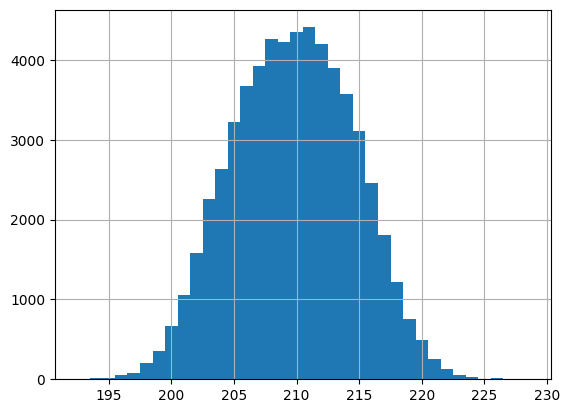

In [4]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [5]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)   ###calcmean###
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


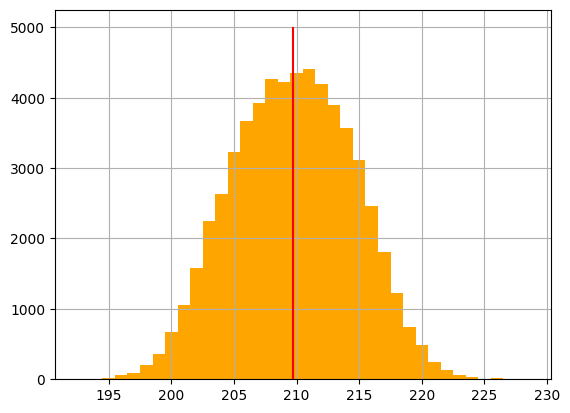

In [6]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')   ###avgplot###
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [7]:
# 定義から計算　                     ### calcvar
zs = data["lidar"].values  
mean = sum(zs)/len(zs)
diff_square = [ (z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))     # 標本分散
unbiased_var = sum(diff_square)/(len(zs)-1) # 不偏分散

print(sampling_var)
print(unbiased_var)

# Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=False) # 標本分散
pandas_default_var = data["lidar"].var()        # デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_default_var)

# NumPyを使用
import numpy as np

numpy_default_var = np.var(data["lidar"])  # デフォルト（標本分散）
numpy_unbiased_var = np.var(data["lidar"], ddof=1)  # 不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504
23.4077097702742
23.408106598554504


In [8]:
import math ###  calcstddev

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用 
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.838192492920729


In [9]:
freqs = pd.DataFrame(data["lidar"].value_counts())  ###freqs###
freqs.transpose() #横向きに出力してみましょう

lidar,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
count,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [19]:
freqs["probs"] = freqs["count"]/sum(freqs["count"]) # 旧バージョン: freqs["probs"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose()

lidar,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
count,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [20]:
sum(freqs["probs"])  ###confirmsum###

1.0

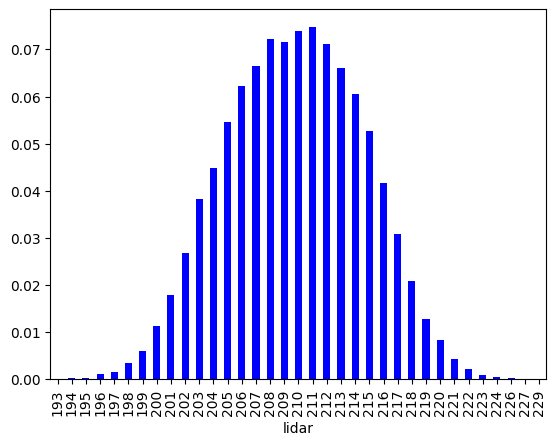

In [21]:
freqs["probs"].sort_index().plot.bar(color="blue")   ###probdist###
plt.show()

In [22]:
def drawing(): #ややこしいので関数として定義  ###one_sampling###
    return freqs.sample(n=1, weights="probs").index[0]

drawing() # 実行

np.int64(206)

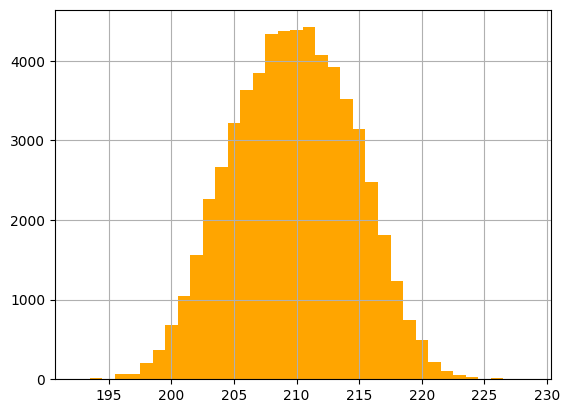

In [14]:
samples = [ drawing() for i in range(len(data))] ### sampling_simulation ###
#samples = [ drawing() for i in range(100)] #コーディング中は1行目の代わりにこちらを使う
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p),color="orange",align='left')  
plt.show()

In [15]:
def p(z, mu=209.7, dev=23.4):   ###pdf_from_def###
    return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

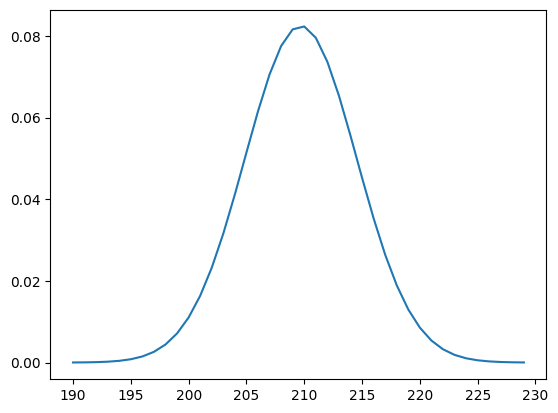

In [16]:
zs = range(190,230)   ###pdf_plot_from_def###
ys = [p(z) for z in zs]

plt.plot(zs,ys)
plt.show()

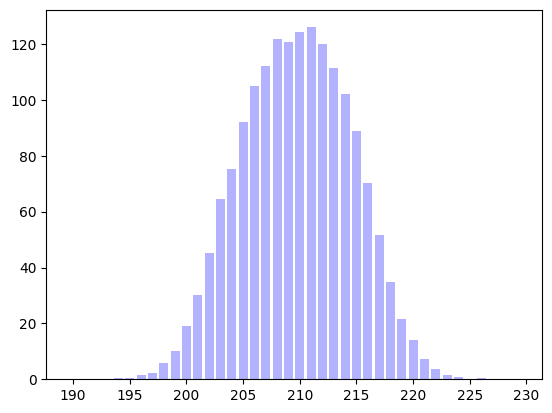

In [17]:
def prob(z,width=0.5):                                     ###prob_plot_from_def###
    return width*( p(z-width) + p(z+width) )

zs = range(190,230)
ys = [prob(z) for z in zs]

plt.bar(zs,ys, color="red", alpha=0.3) #alphaでグラフを透明にできる
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()

In [18]:
from scipy.stats import norm    ###pdf_plot_from_lib###

zs = range(190,230)
ys = [norm.pdf(z, mean1, stddev1) for z in zs]

plt.plot(zs,ys)
plt.show()

ModuleNotFoundError: No module named 'scipy'

In [ ]:
zs = range(190,230)                                ###cdf###
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs,ys, color="red") 
plt.show()

In [ ]:
zs = range(190,230)              ###prob_cdf###
ys = [norm.cdf(z+0.5, mean1, stddev1) -  norm.cdf(z-0.5, mean1, stddev1) for z in zs]

plt.bar(zs,ys)
plt.show()

In [ ]:
data["ir"].hist(bins = max(data["ir"]) - min(data["ir"]),align='left')
plt.show()

In [ ]:
data.ir.plot()
plt.show()